In [4]:
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np
import os
import imageio
import matplotlib.pyplot as plt
from random import shuffle
import pandas as pd

In [29]:
labels= pd.read_csv('labels.csv')

In [30]:
labels = labels.set_index('id')

In [31]:
labels.head()

,breed
id,
000bec180eb18c7604dcecc8fe0dba07,boston_bull
001513dfcb2ffafc82cccf4d8bbaba97,dingo
001cdf01b096e06d78e9e5112d419397,pekinese
00214f311d5d2247d5dfe4fe24b2303d,bluetick
0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [32]:
classes = labels.breed.unique()
len(classes)

120

In [33]:
labels.breed.dtype

dtype('O')

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [39]:
enc = OneHotEncoder(sparse=False)
enc.fit(labels)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [40]:
onehot_label = enc.transform(labels)

In [42]:
onehot_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [47]:
os.listdir('train')[0]

'000bec180eb18c7604dcecc8fe0dba07.jpg'

In [257]:
def get_processed_train():
    train_data = []
    IMG_SIZE = 300

    for img in os.listdir('train')[:3000]:
        img_id = img.split('.')[0]
        label = enc.transform([labels.loc[img_id]])[0]
        path = os.path.join('train', img)
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        X = np.array(img).reshape(IMG_SIZE, IMG_SIZE, 1)
        train_data.append([X, label])

    shuffle(train_data)
    return train_data

In [258]:
data = get_processed_train()

In [259]:
X = np.array([d[0] for d in data])
y = np.array([d[1] for d in data])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [260]:
[len(X_train), len(X_test)]

[2010, 990]

In [261]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes), activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size =  50, epochs = 5, verbose = 1)

Epoch 1/5
2010/2010 [==============================] - 126s 63ms/step - loss: 5.1748 - acc: 0.0139
Epoch 2/5
 700/2010 [=========>....................] - ETA: 1:14 - loss: 4.3471 - acc: 0.0614

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
Image.fromarray(X_test[0].reshape(300,300))

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[0]

In [244]:
def sample_prediction(X, y, p):
    i = int(np.random.uniform() * len(y))
    pred_label = enc.inverse_transform((p[i] == np.max(p[i])).astype(int).reshape(1, -1))[0][0]
    true_label = enc.inverse_transform([y[1]])[0][0]
    print(f"predicted = {pred_label}, actual = {true_label}, Correct = {pred_label==true_label}")
    
    plt.imshow(Image.fromarray(X[i].reshape(300,300)))


predicted = border_terrier, actual = tibetan_mastiff, Correct = False


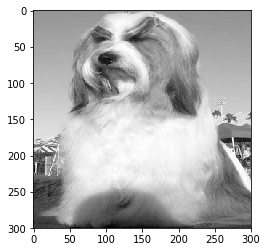

In [256]:
sample_prediction(X_test, y_test, predictions)